# Higher order derivatives, functions and matrix formulation


## Introduction

For convenience, we start with importing some modules needed below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('../styles/mainstyle.use')

In this notebook we extend the concept of finite differences to higher order derivatives. We also discuss the use of Python `functions` and finally we describe how to construct matrices corresponding to the finite-difference operators. This is very useful when solving boundary value problems or eigenvalue problems.

## Higher order derivatives

Using finite differences, we can construct derivatives up to any order. Before we discuss this, we first explicitly describe in detail the second-order derivative that is later used extensively in the course.

### Second-order derivative

Using Taylor's theorem we can write:

```{math}
& f(x+\Delta x) = f(x)+f'(x)\Delta x+\frac12 f''(x)\Delta x^2+\frac16 f'''(x)\Delta x^3+O(\Delta^4) \\
& f(x-\Delta x) = f(x)-f'(x)\Delta x+\frac12 f''(x)\Delta x^2-\frac16 f'''(x)\Delta x^3+O(\Delta^4).
```

If we add these two equations, we can define a centered second-order accurate formula for $f''$ at grid point $x_i$:

```{math}
:label: eq:centeredDiff2
f''_i=\frac{f_{i-1}-2f_i+f_{i+1}}{\Delta x^2}.
```

The stencil for this expression is the sequence $[-1,0,1]$ and we represent it as:

<img width="600px" src="../figures/centeredDiff2.png">

The centered second-order derivative cannot be used at the boundary nodes. Some one-sided formulas are needed at those locations.

Let us write a Python code to check that expression {eq}`eq:centeredDiff2` works as expected. We use the same test function as in the previous notebook - $f(x)=e^x \sin(3\pi x)$ - and we first represent it on a fine grid in the interval $x\in [O, \pi]$.

In [2]:
pi = np.pi       # 3.14...
nx = 200         # number of grid points (fine grid)
lx = pi          # length of the interval
dx = lx / (nx-1) # grid spacing

In [3]:
x = np.linspace(0, lx, nx)   # coordinates for the fine grid
f = np.exp(x)*np.sin(3*pi*x) # function on the fine grid

# Let us build a numpy array for the exact repre-
# sentation of the second-order derivative of f(x):
ddf = np.exp(x)*(np.sin(3*pi*x) + 6*pi*np.cos(3*pi*x)-9*pi**2*np.sin(3*pi*x))

We now build a coarse grid with $80$ points, and evaluate the second-order derivative using the centered finite difference formula; note how we use the slicing technique we described in the previous notebook.

In [4]:
nx = 80 # number of grid points (coarse grid)
lx = pi # length of interval
dx = lx / (nx-1) # grid spacing
x_c = np.linspace(0, lx, nx) # coordinates of points on the coarse grid

f_c = np.exp(x_c)*np.sin(3*pi*x_c) # function on the coarse grid

ddf_c = np.empty(nx)
ddf_c[1:-1] = (f_c[:-2] -2*f_c[1:-1] +f_c[2:]) / dx**2 # boundary nodes are included

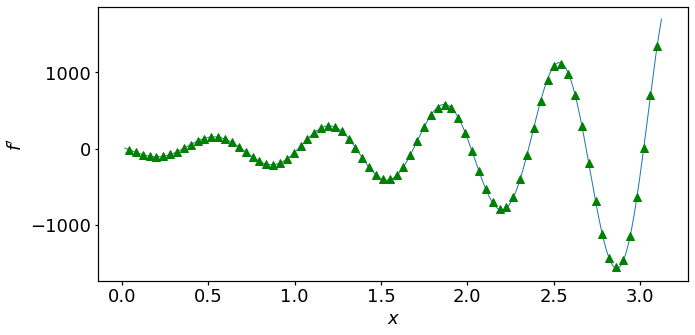

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x[1:-1], ddf[1:-1])
ax.plot(x_c[1:-1], ddf_c[1:-1], '^g')
ax.set_xlabel('$x$')
ax.set_ylabel('$f\'$');

As the centered formula for $f''$ is not defined at the boundary nodes, they have been excluded in the computation. But in the next section, we will provide information on how to cope with this issue.

### Higher order derivatives and one-sided stencils

It should now be clear that the construction of finite difference formulas to compute differential operators can be done using Taylor's theorem. In general, as we increase the order of the derivative, we have to increase the number of points in the corresponding stencil. The construction of these stencils is not complicated and is well documented in several places, so we will not repeat it here. Instead we refer to the very detailed [Wikipedia][21] page that contains finite difference formulas for all the cases we use in this course, and many more.

To make this notebook self contained, we list here some of the formulas we will/might need later on.

We begin we some **centered finite difference** expressions:

<br>
<table class="wikitable" style="text-align:center">
	<tbody>
		<tr>
			<th>Derivative</th>
			<th>Accuracy</th>
			<th>&minus;3</th>
			<th>&minus;2</th>
			<th>&minus;1</th>
			<th>0</th>
			<th>1</th>
			<th>2</th>
			<th>3</th>
		</tr>
		<tr>
			<td rowspan="2">1</td>
			<td>2</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&minus;1/2</td>
			<td>0</td>
			<td>1/2</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>4</td>
			<td>&nbsp;</td>
			<td>1/12</td>
			<td>&minus;2/3</td>
			<td>0</td>
			<td>2/3</td>
			<td>&minus;1/12</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td rowspan="2">2</td>
			<td>2</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>1</td>
			<td>&minus;2</td>
			<td>1</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>4</td>
			<td>&nbsp;</td>
			<td>&minus;1/12</td>
			<td>4/3</td>
			<td>&minus;5/2</td>
			<td>4/3</td>
			<td>&minus;1/12</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td rowspan="2">3</td>
			<td>2</td>
			<td>&nbsp;</td>
			<td>&minus;1/2</td>
			<td>1</td>
			<td>0</td>
			<td>&minus;1</td>
			<td>1/2</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>4</td>
			<td>1/8</td>
			<td>&minus;1</td>
			<td>13/8</td>
			<td>0</td>
			<td>&minus;13/8</td>
			<td>1</td>
			<td>&minus;1/8</td>
		</tr>
		<tr>
			<td rowspan="2">4</td>
			<td>2</td>
			<td>&nbsp;</td>
			<td>1</td>
			<td>&minus;4</td>
			<td>6</td>
			<td>&minus;4</td>
			<td>1</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>4</td>
			<td>&minus;1/6</td>
			<td>2</td>
			<td>&minus;13/2</td>
			<td>28/3</td>
			<td>&minus;13/2</td>
			<td>2</td>
			<td>&minus;1/6</td>
		</tr>
	</tbody>
</table>

You should recognize the centered difference stencils we have already discussed for the first- and second-order derivatives. Each line contains the coefficients $c_j$ to be applied at the corresponding stencil point; to complete the finite difference formula, we also need to divide the finite difference by $\Delta x^k$ where $k$ is the order of derivative. For example, the second-order accurate formula for the fourth-order derivative is:

```{math}
f''''_i = \frac{f_{i-2}-4f_{i-1}+6f_{i}-4f_{i+1}+f_{i+2}}{\Delta x^4}.
```

Graphically we have:

<img width="800px" src="../figures/centeredDiff4.png">

We have seen that centered stencils are not applicable at boundary nodes. Thankfully, alternate finite difference formulas can be constructed for these nodes and the [Wikipedia][21]
page also lists a large collections of such **one-sided formulas**. Here we limit our attention to first- and second-order accurate expressions.

[21]: <https://en.wikipedia.org/wiki/Finite_difference_coefficient> "list of finite difference formulas"

**Forward one-sided finite difference formulas:**

<table class="wikitable" style="text-align:center">
	<tbody>
		<tr>
			<th>Derivative </th>
			<th>Accuracy </th>
			<th>0 </th>
			<th>1 </th>
			<th>2 </th>
			<th>3 </th>
			<th>4 </th>
			<th>5 </th>
		</tr>
		<tr>
			<td rowspan="2">1 </td>
			<td>1</td>
			<td>−1</td>
			<td>1</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>2</td>
			<td>−3/2</td>
			<td>2</td>
			<td>−1/2</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td rowspan="2">2 </td>
			<td>1</td>
			<td>1</td>
			<td>−2</td>
			<td>1</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>2</td>
			<td>2</td>
			<td>−5</td>
			<td>4</td>
			<td>−1</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td rowspan="2">3 </td>
			<td>1</td>
			<td>−1</td>
			<td>3</td>
			<td>−3</td>
			<td>1</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>2</td>
			<td>−5/2</td>
			<td>9</td>
			<td>−12</td>
			<td>7</td>
			<td>−3/2</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td rowspan="2">4 </td>
			<td>1</td>
			<td>1</td>
			<td>−4</td>
			<td>6</td>
			<td>−4</td>
			<td>1</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>2</td>
			<td>3</td>
			<td>−14</td>
			<td>26</td>
			<td>−24</td>
			<td>11</td>
			<td>−2</td>
		</tr>
	</tbody>
</table>

**Backward one-sided finite difference formulas:**

<table class="wikitable" style="text-align:center">
	<tbody>
		<tr>
			<th>Derivative </th>
			<th>Accuracy </th>
			<th>−5 </th>
			<th>−4 </th>
			<th>−3 </th>
			<th>−2 </th>
			<th>−1 </th>
			<th>0 </th>
		</tr>
		<tr>
			<td rowspan="2">1 </td>
			<td>1</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>−1</td>
			<td>1 </td>
		</tr>
		<tr>
			<td>2</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>1/2</td>
			<td>−2</td>
			<td>3/2 </td>
		</tr>
		<tr>
			<td rowspan="2">2 </td>
			<td>1</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>1</td>
			<td>−2</td>
			<td>1 </td>
		</tr>
		<tr>
			<td>2</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>−1</td>
			<td>4</td>
			<td>−5</td>
			<td>2 </td>
		</tr>
		<tr>
			<td rowspan="2">3 </td>
			<td>1</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>−1</td>
			<td>3</td>
			<td>−3</td>
			<td>1 </td>
		</tr>
		<tr>
			<td>2</td>
			<td>&nbsp;</td>
			<td>3/2</td>
			<td>−7</td>
			<td>12</td>
			<td>−9</td>
			<td>5/2 </td>
		</tr>
		<tr>
			<td rowspan="2">4 </td>
			<td>1</td>
			<td>&nbsp;</td>
			<td>1</td>
			<td>−4</td>
			<td>6</td>
			<td>−4</td>
			<td>1 </td>
		</tr>
		<tr>
			<td>2</td>
			<td>−2</td>
			<td>11</td>
			<td>−24</td>
			<td>26</td>
			<td>−14</td>
			<td>3 </td>
		</tr>
	</tbody>
</table>

Again, you should recognize the one-sided formulas we described in the previous notebook for the first-order derivative.

## Functions

Up to now, we have explicitly written new Python code whenever we implemented a particular concept. In the long term, this is not convenient as we often need to re-use the same pieces of code over and over again. Fortunately, most programming languages - including Python - make this task easy to achieve through the use of *functions*. Don't confuse the concept of functions in programming languages and mathematical functions. This section is devoted to Python functions. Further in the course we will try to be explicit about what is meant but you can normally figure it out from the context. Before digging into more detail, let's consider an example. Say we want to create a (Python) function that computes the centered second-order derivative of some (mathematical) function. We may implement this function as follows (details about how to do this are given below):

In [6]:
def compute_ddf_c(f):

    ddf_c = np.empty_like(f)
    ddf_c[1:-1] = f[:-2] -2*f[1:-1] +f[2:] # boundary nodes are not included
    ddf_c[0] = 2*f[0] - 5*f[1] + 4*f[2] - f[3] # f'' at left boundary node
    ddf_c[-1] = -f[-4] + 4*f[-3] -5*f[-2] + 2*f[-1] # f'' at right boundary node

    return ddf_c / dx**2

To compute the second-order derivative of our previously defined (mathematical) function `f_c`, we call the (Python) function like this:

In [7]:
ddf_c_from_func = compute_ddf_c(f_c)

The prototype of a Python function looks like this:

In [8]:
def some_function(parameters):

    statements

    return something

`parameters` is the list of arguments (e.g. variables, objects,...) that are passed to the function when calling it.

`statements` constitute the actual Python commands executed within the function. These can be any legal Python code.

`something` is what the programmer wants to provide as output from the function after execution of all the statements (e.g. the result of some arithmetic operations). The return statement is optional.

To make things less abstract, let's discuss some examples.

### Parameters

In [9]:
def print_name_and_data(name, age, height, weight):
    print(f'Hello, {name}. You are {age}, measure {height} m and weigh {weight} kg.')

The `print_name_and_data` function has four input parameters. It simply prints a statement using these four parameters and is called like this:

In [10]:
print_name_and_data('Luke', 28, 1.75, 72)

Hello, Luke. You are 28, measure 1.75 m and weigh 72 kg.


The function requires four *positional arguments* and they must be supplied exactly like in its definition. The term "positional arguments" speaks for itself. Their position must be respected when you pass them to the function - the order must be the same as in the definition of a function. Calling the function like,

In [11]:
print_name_and_data('Luke', 28, 72, 1.75)

Hello, Luke. You are 28, measure 72 m and weigh 1.75 kg.


results in an undesired ouput. If you want to specify the arguments in the 'wrong' order, you may pass them as *keyword arguments:*

In [12]:
print_name_and_data(age=28, name='Luke', weight=72, height=1.75)

Hello, Luke. You are 28, measure 1.75 m and weigh 72 kg.


If you omit one or more of the parameters, Python will throw an error:

In [13]:
print_name_and_data('Luke')

TypeError: print_name_and_data() missing 3 required positional arguments: 'age', 'height', and 'weight'

You can mix positional and keyword parameters. The only restriction is that keyword arguments must come after all positional arguments:

In [14]:
print_name_and_data('Luke', 28, weight=72, height=1.75)

Hello, Luke. You are 28, measure 1.75 m and weigh 72 kg.


You may also define the function with some default values for the parameters. In that case, they become optional and assume their default values when omitted in the function call. For example let's define a new function:

In [15]:
def print_name_and_handedness(name, handedness='right-handed'):
    print(f'Hello, {name}. You are {handedness}.')

If you call the function without passing the second argument, you get:

In [16]:
print_name_and_handedness('Luke')

Hello, Luke. You are right-handed.


But you can supply a different value if needed:

In [17]:
print_name_and_handedness('Luke', 'left-handed')

Hello, Luke. You are left-handed.


### Return statement

The last statement of a function can be a `return` statement, with which the programmer can send some information or data produced within the function back to the main program or calling routine. As an example, let's define a function that returns the body mass index of an individual:

In [18]:
def compute_bmi(name, height, weight):
    print(f'Hello, {name}. I am returning your body mass index...')

    bmi = weight / height**2

    return bmi # we could have written directly: return weight / height**2

We can then store the return value in any variable like this:

In [19]:
luke_bmi = compute_bmi('Luke', 1.75, 70)
print(luke_bmi)

Hello, Luke. I am returning your body mass index...
22.857142857142858


The function can return any Python object (dictionaries, arrays, numbers, ...) or a collection of them. In the example below, we return the average of two numbers and their difference:

In [20]:
def compute_avg_diff(number1, number2):

    average = 0.5 * (number1+number2)
    difference = number1-number2

    return average, difference

Note how the two return values are separated by a comma. This function can be called like this:

In [21]:
avg1, diff1 = compute_avg_diff(10, 8)
print(f'The average is {avg1} and the difference is {diff1}.')

The average is 9.0 and the difference is 2.


### Variable scope

A very important concept when discussing functions is the so-called *scope* of a variable. There are generally speaking two types of variables: **global** variables or **local** variables. Global variables can be accessed anywhere in a program. Local variables can only be accessed within the function, in which they are defined. But you may always return their values outside of the function by using a `return` statement.

Let first consider an example involving a global variable:

In [22]:
def print_a():
    print(a)

In [23]:
a=1
print_a()
a=2
print_a()

1
2


The code executed without errors and each time we modify `a` the function prints the correct value because this global variable, defined outside of the function, is accessible within the function. Let's try something else:

In [24]:
def multiply_a_and_b(a, b):
    prod = a*b
    print(f'The product between a and b is {prod}.')

In [25]:
prod = 3
multiply_a_and_b(3, 6)
print(f'Here prod is equal to {prod}.')

The product between a and b is 18.
Here prod is equal to 3.


Here we get two different outputs. Outside of the function, we have defined the global variable `prod` and assigned it the value $3$. But inside the function, we re-use the name `prod` to store the product of `a` and `b`. By doing so, we are creating a new variable `prod` that is qualified as a *local variable*. This variable only exists inside the function and when it is addressed by name in the function, it has *priority* over the global variable. The global variable will therefore not be changed by any statement in the function. You must be very careful with the usage of global variables, it's very easy to be confused about what you are doing if you or another programmer later introduces a local variable with the same name in a function. Usually, it is recommended to avoid using global variables or to really keep their numbers to a strict minimum.

NB: there is a way to freely use global variables within the scope of a function; it requires the usage of the `global` keyword associated with a variable. But we won't document this feature as we discourage you to use it in the context of this course.

### Beware passing by object reference in Python!

There is another common source of errors when manipulating sequences (or numpy arrays) as arguments of functions. Remember what we discussed in the section "Referenced or copied?" of the previous notebook. We observed a fundamental difference when assigning a new name to a variable depending on whether it was a number or a list. We recall here two examples:

In [26]:
a = 1
b = a
b = 2
print(a)

1


In the second line of the above cell, we are referencing with `b` the same number as `a`. In the third line, we are changing the number to which `b` is referencing and this does not affect `a`. When we manipulate lists, the situation is different. Let's consider this example:

In [27]:
a = [0, 1, 2, 4]
b = a
b[0] = 5
print(a)

[5, 1, 2, 4]


In the second line of the cell, we are referencing with `b` the same sequence as `a` and we are not copying this sequence to another location in memory. So when we write `b[0] = 5` we are affecting the same list as if we had written `a[0] = 5`.

Now consider how this can cause possible unwanted behaviors when calling functions:

In [28]:
def test_func(seq1):
    sequence = seq1
    sequence[0] = 0
    print(f'Inside the function, the sequence is {sequence}.')

In [29]:
seq = [1, 1, 1, 1]
test_func(seq)

print(f'Outside of the function, the sequence is {seq}.')

Inside the function, the sequence is [0, 1, 1, 1].
Outside of the function, the sequence is [0, 1, 1, 1].


Because we did not make a copy of the original sequence when writing `sequence = seq1` we are changing its content with `sequence[0] = 0`. Therefore, such statements can have an effect outside of the function and you must be really careful depending on whether it is intended or not. If you do not want to modify the sequence outside of the function, you could write instead:

In [30]:
def test_func(seq1):
    sequence = seq1.copy()
    sequence[0] = 0
    print(f'Inside the function, the sequence is {sequence}.')

In [31]:
seq = [1, 1, 1, 1]
test_func(seq)

print(f'Outside of the function, the sequence is {seq}.')

Inside the function, the sequence is [0, 1, 1, 1].
Outside of the function, the sequence is [1, 1, 1, 1].


Another possibility is:

In [32]:
def test_func(seq1):
    sequence = seq1
    sequence[0] = 0
    print(f'Inside the function, the sequence is {sequence}.')

In [33]:
seq = [1, 1, 1, 1]
test_func(seq.copy())

print(f'Outside of the function, the sequence is {seq}.')

Inside the function, the sequence is [0, 1, 1, 1].
Outside of the function, the sequence is [1, 1, 1, 1].


We prefer this second option, as the original sequence is never within reach of the inside the function. We explicitly call it with a copy of the sequence.

One more word of caution: here we illustrated the possible outcomes using sequences of numbers. When the sequences contain nested Python objects and you don't want to affect the sequence at all inside the function, you must use `deepcopy()` instead of `copy()`. But this should not be a source of concern for the type of objects we manipulate in this course.

## Matrix formulation

At this stage we know how to build Python functions that return the derivatives of functions based on finite difference formulas. Conceptually, we have defined the *action* of differential operators on functions: we pass a function to a Python function and it returns the derivative. This means that we have not explicitly constructed the differential operator. For some problems, this is needed and in this section we show how this is done.

Mathematically, we denote the action of any linear operator $\cal{A}$ acting on a function $f$ as:

```{math}
    h(x)=\cal{A}f(x)
```

If we discretize this equation on a numerical grid, we need a discretized version of the operator $\cal{A}$ that maps the values of $f$ at the grid points onto the values of $h$ at the grid points. As the operation is linear, this mapping is done through the action of a matrix:

```{math}
    h_i=A_{ij}f_j\;\;\;\; \hbox{(repeated indices are summed)}
```

Let's first lay out the matrix $A_{ij}$ corresponding to the centered (second-order accurate) first-order derivative; as we want to build the operator everywhere in the domain including the boundary nodes, we use second-order one-sided finite differences at these locations:

```{math}
\begin{pmatrix}
    h_0 \\
    h_1 \\
    \vdots \\
    h_{j-1}\\
    h_j \\
    h_{j+1}\\
    \\
    \vdots \\
    h_{n-2} \\
    h_{n-1}
\end{pmatrix}
=
\frac{1}{\Delta x}
\begin{pmatrix}
-3/2 & 2 & -1/2 & 0 & 0 & \dots & 0 & 0 & 0 & 0\\
-1/2 & 0 & 1/2 & 0 & 0 & \dots & 0 & 0 & 0 & 0 \\
0 & -1/2 & 0 & 1/2 & 0 & \dots & 0 & 0 & 0 & 0 \\
0 & 0 & -1/2 & 0 & 1/2 & \dots & 0 & 0 & 0 & 0 \\
0 & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & 0 \\
0 & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & 0 \\
0 & 0 & 0 & 0  & \dots & -1/2 & 0 & 1/2 & 0 & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & -1/2 & 0 & 1/2 & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & 0 & -1/2 & 0 & 1/2 \\
0 & 0 & 0 & 0 & \dots & 0 & 0 & 1/2 & -2 & 3/2
\end{pmatrix}
\begin{pmatrix}
    f_0 \\
    f_1 \\
    \vdots \\
    f_{j-1}\\
    f_j \\
    f_{j+1}\\
    \\
    \vdots \\
    f_{n-2} \\
    f_{n-1}
\end{pmatrix}
```

By performing the matrix multiplication, we see that the matrix $A_{ij}$ produces exactly the desired mapping. We can now define a Python function to create this matrix. Its input parameters are the number of grid points and $\Delta x$. Remember that in the `numpy` terminology, a matrix is considered a 2D array (`ndarray`).

We use here the Python package `scipy` that we briefly described in the *01_Introduction* notebook. It contains a useful function, `diags` to create matrices that are essentially diagonal (you should look at its [documentation page][31] for its exact definition). A matrix is referred to as *sparse* when it contains mostly zeros, except at sparse locations; these are usually concentrated around the diagonal. The function `diags` belongs to the `sparse` submodule of `scipy` and you import it using the following command:

[31]: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html> "documentation for scipy.sparse.diags"

In [34]:
from scipy.sparse import diags

In [35]:
def d1_mat(nx, dx):
    """
    Constructs the centered second-order accurate first-order derivative

    Parameters
    ----------
    nx : integer
        number of grid points
    dx : float
        grid spacing

    Returns
    -------
    d1mat : numpy.ndarray
        matrix to compute the centered second-order accurate first-order derivative
    """
    diagonals = [[-1./2.], [0], [1./2.]] # main diagonal elements
    offsets = [-1, 0, 1] # positions of the diagonal entries relative to the main diagonal

    # Call to the diags routine; note that diags returns a *representation* of the array;
    # to explicitly obtain its ndarray realisation, the call to .toarray() is needed.
    d1mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()

    # We replace the first and last lines of d1mat with the proper
    # one-sided finite differences
    d1mat[0, :3] = np.array([-3./2., 2, -1./2.]) # first line
    d1mat[-1, -3:] = np.array([1./2., -2, 3./2.]) # second line

    # Return the final array divided by the grid spacing
    return d1mat / dx

We can then obtain an instance of the array by calling `d1_mat`. As an example and to make sure the coefficients are properly set, we call it with a value of $\Delta x=1$ and output the result:

In [36]:
nx = 10 # number of grid points for the example
dx = 1 # grid spacing

In [37]:
d1mat = d1_mat(nx, dx)
print(d1mat)

[[-1.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  0.   0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.   0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0.   0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  0.   0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.5 -2.   1.5]]


Looks good!

Using exactly the same ideas, the explicit representation of a discrete version of the second-order derivative can be constructed. Here is a Python function that returns the matrix corresponding to the centered second-order accurate finite difference formula:

In [38]:
def d2_mat(nx, dx):
    """
    Constructs the centered second-order accurate second-order derivative

    Parameters
    ----------
    nx : integer
        number of grid points
    dx : float
        grid spacing

    Returns
    -------
    d2mat : numpy.ndarray
        matrix to compute the centered second-order accurate first-order derivative
    """
    diagonals = [[1.], [-2.], [1.]] # main diagonal elements
    offsets = [-1, 0, 1] # positions of the diagonal entries relative to the main diagonal

    # Call to the diags routine; note that diags return a representation of the array;
    # to explicitly obtain its ndarray realisation, the call to .toarray() is needed.
    d2mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()

    # We replace the first and last lines of d1mat with the proper
    # one-sided finite differences
    d2mat[0, :4] = np.array([2., -5, 4., -1.]) # first line
    d2mat[-1, -4:] = np.array([-1., 4., -5., 2.]) # second line

    # Return the final array divided by the grid spacing **2
    return d2mat / dx**2

Let's check again that everything works as expected:

In [39]:
d2mat = d2_mat(nx, dx)
print(d2mat)

[[ 2. -5.  4. -1.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0. -1.  4. -5.  2.]]


Again we obtain the desired result.

## Summary

In this notebook we have explained how to obtain a second-order accurate finite difference formula for the second-order derivative of a function and we have provided recipes to construct many other differential operators - many more can be found on this [Wikipedia][1] page. We also discussed the concept of Python functions to produce re-usable pieces of source code. Finally, we have shown how to explicitly construct discrete versions of differential operators in matrix form. These will be used in the following notebook to solve what are known as boundary value problems.

[1]: <https://en.wikipedia.org/wiki/Finite_difference_coefficient> "list of finite difference formulas"